# Agglomerative Clustering

Taken from https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [1]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline

In [2]:
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

(150, 2)


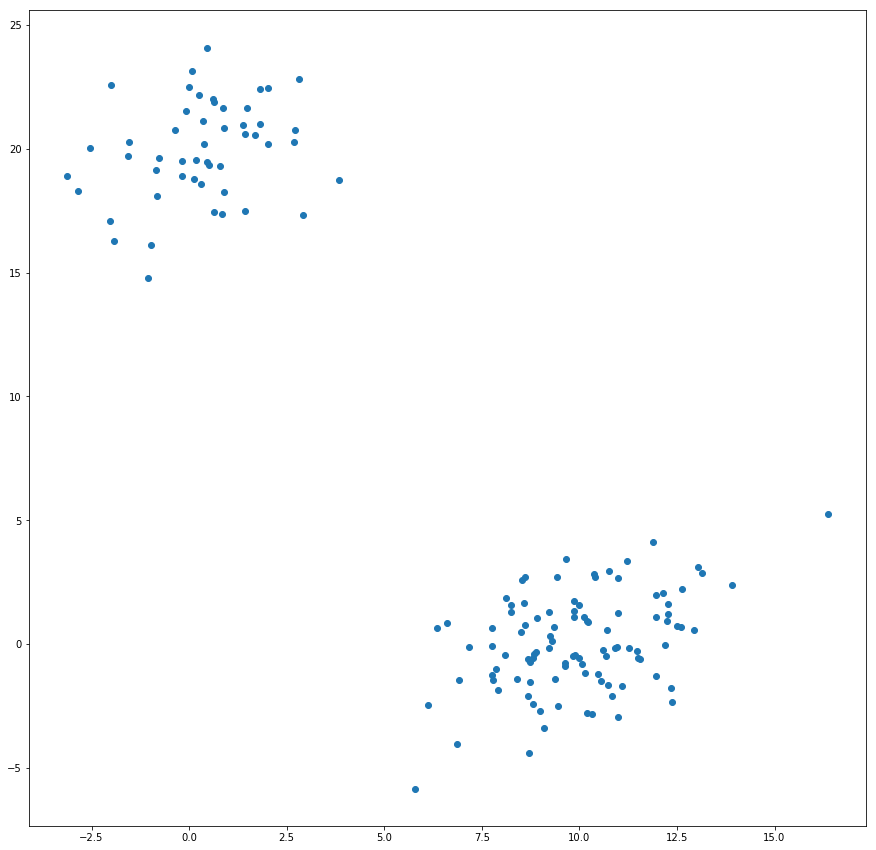

In [3]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print X.shape  # 150 samples with 2 dimensions
plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1])
plt.show()

As the scipy linkage docs tell us, 'ward' is one of the methods that can be used to calculate the distance between newly formed clusters. 'ward' causes linkage() to use the Ward variance minimization algorithm.

I think it's a good default choice, but it never hurts to play around with some other common linkage methods like 'single', 'complete', 'average', ... and the different distance metrics like 'euclidean' (default), 'cityblock' aka Manhattan, 'hamming', 'cosine'... if you have the feeling that your data should not just be clustered to minimize the overall intra cluster variance in euclidean space. For example, you should have such a weird feeling with long (binary) feature vectors (e.g., word-vectors in text clustering).

As you can see there's a lot of choice here and while python and scipy make it very easy to do the clustering, it's you who has to understand and make these choices. If i find the time, i might give some more practical advice about this, but for now i'd urge you to at least read up on the linked methods and metrics to make a somewhat informed choice. Another thing you can and should definitely do is check the Cophenetic Correlation Coefficient of your clustering with help of the cophenet() function. This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances, which in our case is pretty close:

In [4]:
# generate the linkage matrix
Z = linkage(X, 'single')

In [5]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.98019104281875613

In its first iteration the linkage algorithm decided to merge the two clusters (original samples here) with indices 52 and 53, as they only had a distance of 0.04151. This created a cluster with a total of 2 samples.

In [6]:
Z[0]

array([ 52.     ,  53.     ,   0.04151,   2.     ])

Similarly second iteration is

In [7]:
Z[1]

array([ 14.     ,  79.     ,   0.05914,   2.     ])

Lets look at the first 30 iterations.  Notice the monotinic increase in distance.  Recall that we only have 150 data points.  So any index > 149 refers to a merged cluster.   

In [8]:
Z[:30]

array([[  52.     ,   53.     ,    0.04151,    2.     ],
       [  14.     ,   79.     ,    0.05914,    2.     ],
       [  33.     ,   68.     ,    0.07107,    2.     ],
       [  17.     ,   73.     ,    0.07137,    2.     ],
       [   1.     ,    8.     ,    0.07543,    2.     ],
       [  85.     ,   95.     ,    0.10928,    2.     ],
       [ 108.     ,  131.     ,    0.11007,    2.     ],
       [   9.     ,   66.     ,    0.11302,    2.     ],
       [  15.     ,   69.     ,    0.11429,    2.     ],
       [  63.     ,   98.     ,    0.1212 ,    2.     ],
       [ 107.     ,  115.     ,    0.12167,    2.     ],
       [  65.     ,   74.     ,    0.1249 ,    2.     ],
       [  41.     ,  158.     ,    0.13314,    3.     ],
       [  58.     ,   61.     ,    0.14028,    2.     ],
       [  62.     ,  152.     ,    0.14862,    3.     ],
       [ 154.     ,  162.     ,    0.17334,    5.     ],
       [  22.     ,  150.     ,    0.18425,    3.     ],
       [  10.     ,   83.     ,

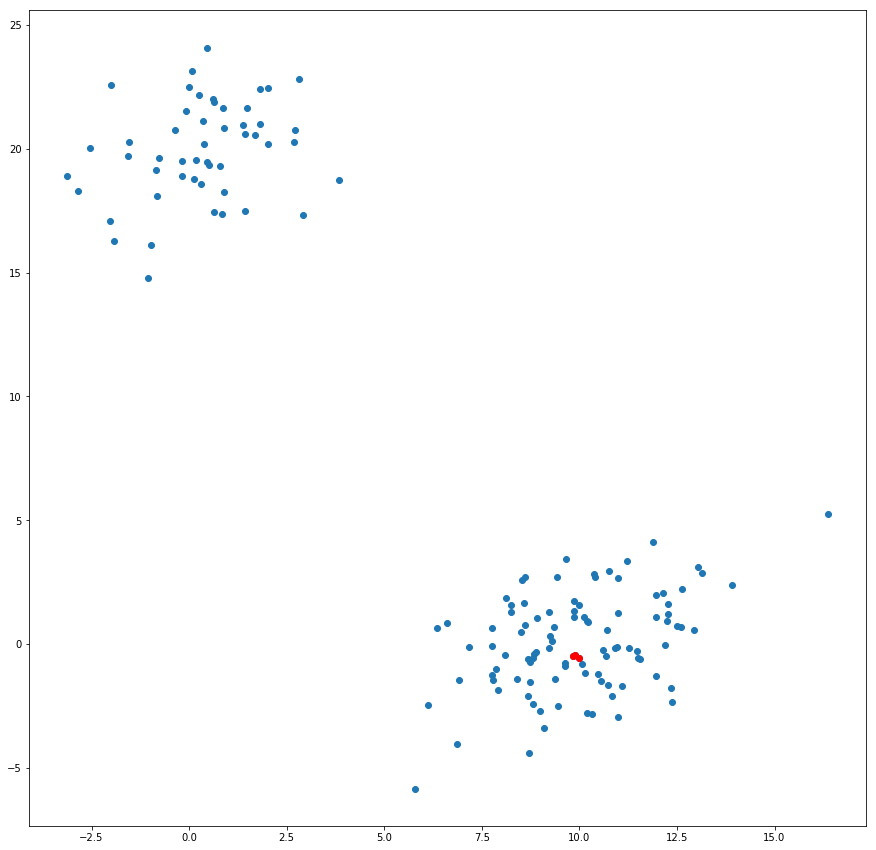

In [12]:


idxs = [33, 68, 62]
plt.figure(figsize=(15, 15))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()

In [10]:
def find_idx(Z, idx, D):
    idx1 = Z[idx][0]
    idx2 = Z[idx][1]
    
    if (idx1 >= len(Z)): 
        find_idx(Z, int(idx1)-len(Z), D)
    else:
        D.append(idx1)
    if (idx2 >= len(Z)):
        find_idx(Z, int(idx2)-len(Z), D)
    else:
        D.append(idx2)
    
    

In [11]:
print Z[14]

D = []
find_idx(Z, 14, D)
print D

[  62.       152.         0.14862    3.     ]
[62.0, 17.0, 73.0]


In [30]:
Z[:20]

array([[  52.     ,   53.     ,    0.04151,    2.     ],
       [  14.     ,   79.     ,    0.05914,    2.     ],
       [  33.     ,   68.     ,    0.07107,    2.     ],
       [  17.     ,   73.     ,    0.07137,    2.     ],
       [   1.     ,    8.     ,    0.07543,    2.     ],
       [  85.     ,   95.     ,    0.10928,    2.     ],
       [ 108.     ,  131.     ,    0.11007,    2.     ],
       [   9.     ,   66.     ,    0.11302,    2.     ],
       [  15.     ,   69.     ,    0.11429,    2.     ],
       [  63.     ,   98.     ,    0.1212 ,    2.     ],
       [ 107.     ,  115.     ,    0.12167,    2.     ],
       [  65.     ,   74.     ,    0.1249 ,    2.     ],
       [  41.     ,  158.     ,    0.13314,    3.     ],
       [  58.     ,   61.     ,    0.14028,    2.     ],
       [  62.     ,  152.     ,    0.14862,    3.     ],
       [ 154.     ,  162.     ,    0.17334,    5.     ],
       [  22.     ,  150.     ,    0.18425,    3.     ],
       [  10.     ,   83.     ,